In [1]:
from stesml.model_tools import final_train
from stesml.model_tools import validate_model
from stesml.model_tools import get_h_from_T_results
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data

from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error

from stesml.stes_model import stes_model

import datetime

from tensorflow import keras
import xgboost as xgb

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [14]:
data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'NN_20220708-23'
model_type = 'XGBoost' # Options: NN, XGBoost, RandomForest
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1

In [15]:
parameters = stes_model.get_parameters(model_type)

In [16]:
#parameters = {'learning_rate': 0.3, 'subsample': 1, 'colsample_bytree': 1, 'num_boost_round': 160}

In [17]:
train_model = True

if train_model:
    model, addendum = final_train(data_dir, model_type, target, scale, parameters)

[14:16:34] WARNING: ../src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	test-rmse:90.21586
[20]	test-rmse:31.43011
[40]	test-rmse:10.49498
[60]	test-rmse:6.08738
[80]	test-rmse:5.12524
[100]	test-rmse:5.04799
[120]	test-rmse:4.99817


KeyboardInterrupt: 

In [17]:
save_model_and_addendum = True

if save_model_and_addendum:
    stes_model.save_model(model, model_type, addendum)

INFO:tensorflow:Assets written to: ../models/NN_20220708-23/assets


In [20]:
load_model_and_addendum = True

if load_model_and_addendum:
    model, addendum = stes_model.load_model(model_type, model_name)

In [9]:
results = validate_model(model, model_type, data_dir, target, scale, addendum)

RMSE: 2.6726589, R2: 0.9989526


In [10]:
val_df = results['val_df']

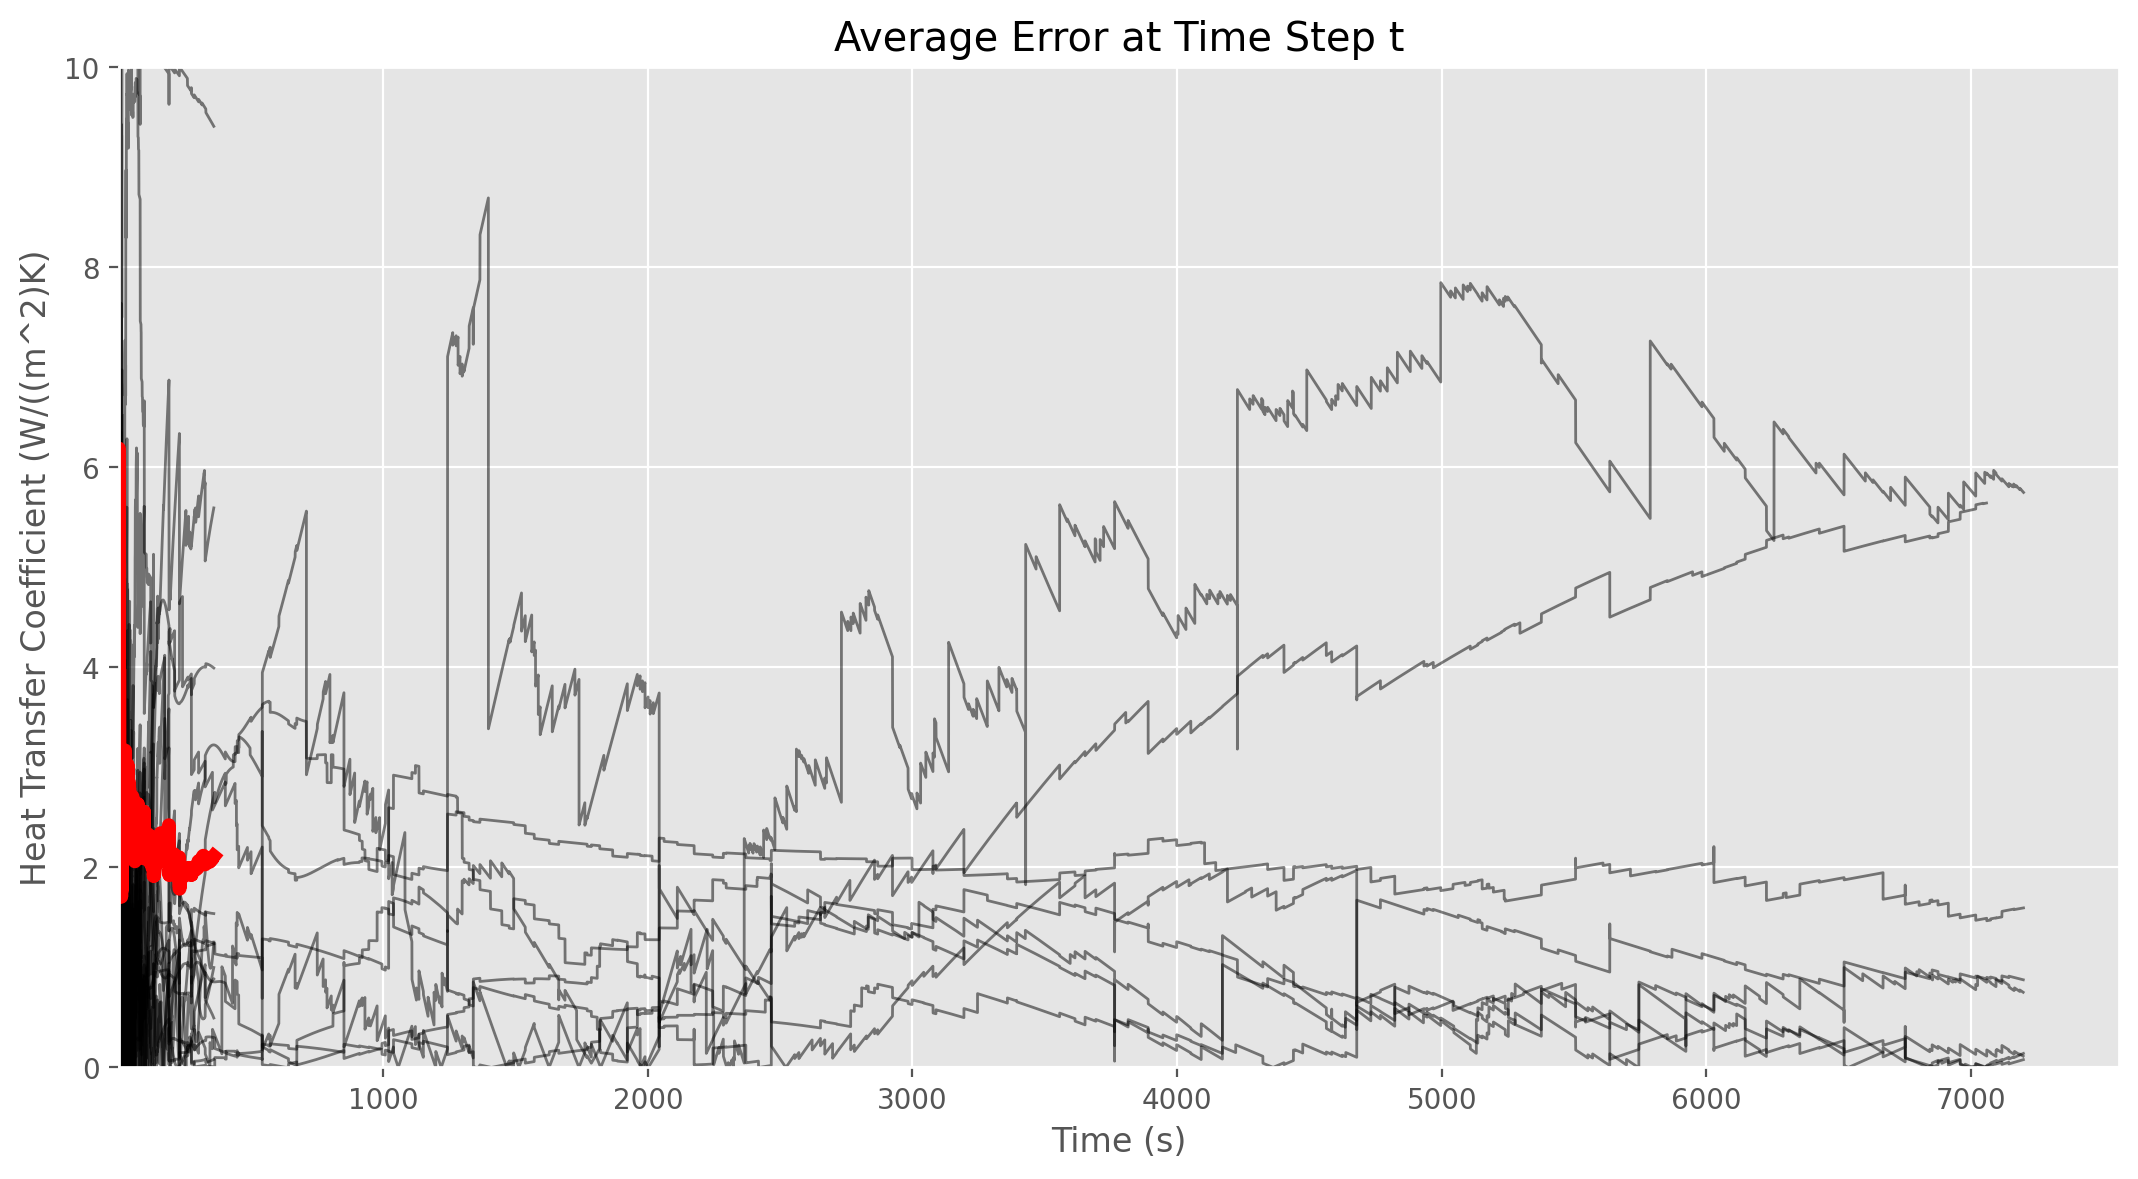

In [11]:
avg_error = plot_average_error(val_df, target=target)

<AxesSubplot:>

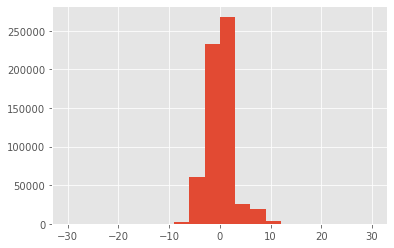

In [12]:
(val_df[target] - val_df[target+'_hat']).hist(bins=20, range=(-30, 30))

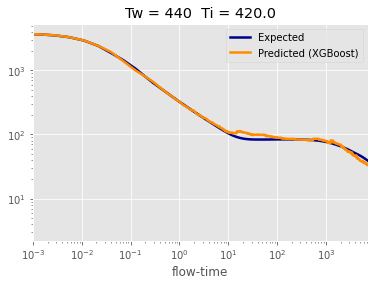

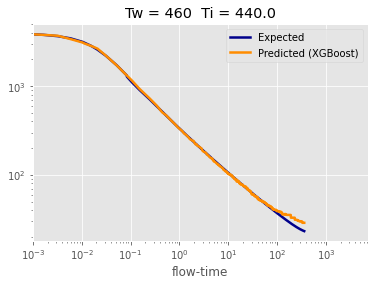

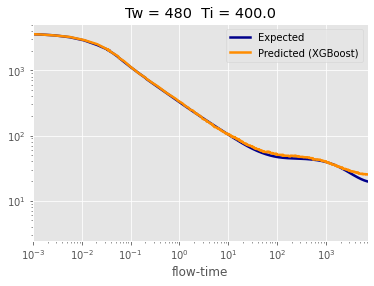

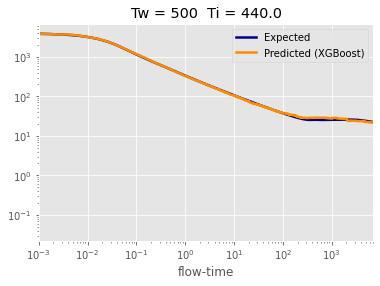

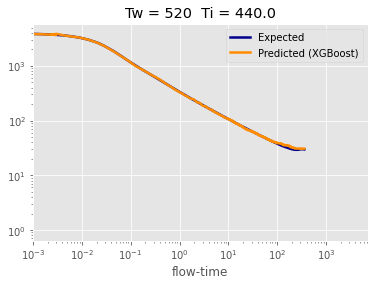

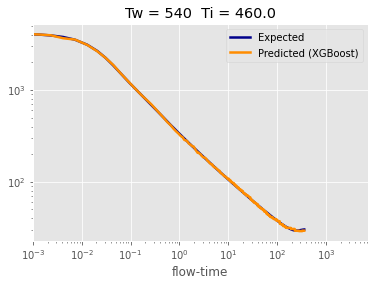

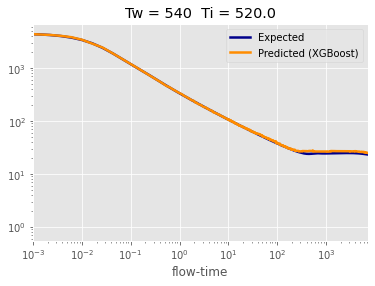

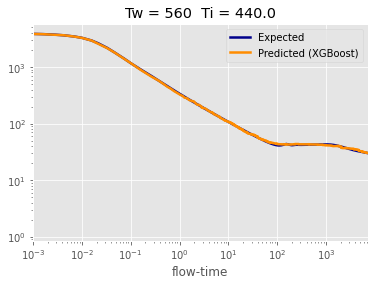

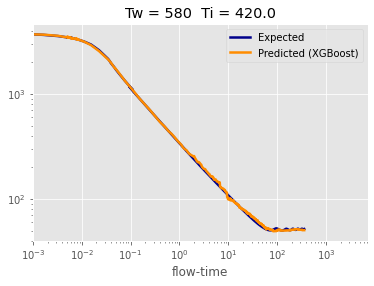

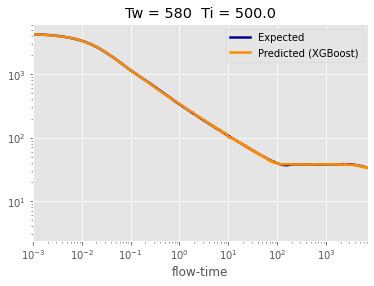

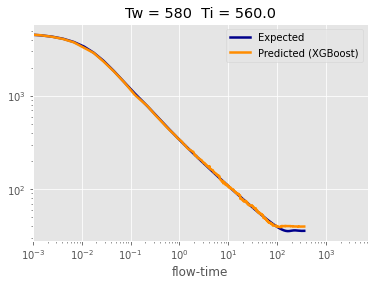

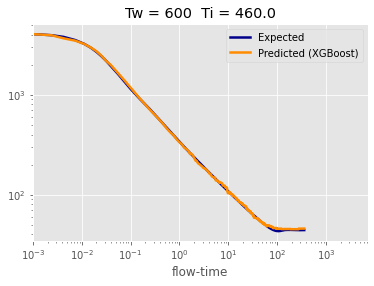

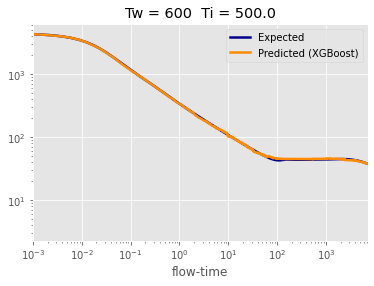

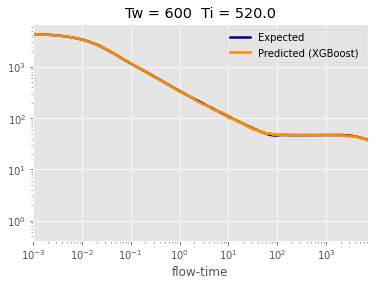

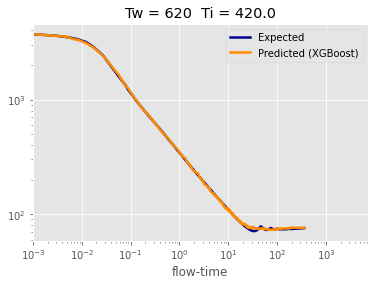

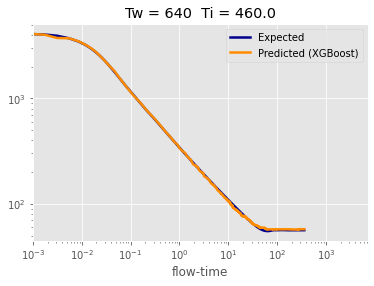

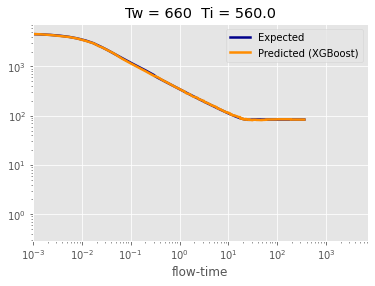

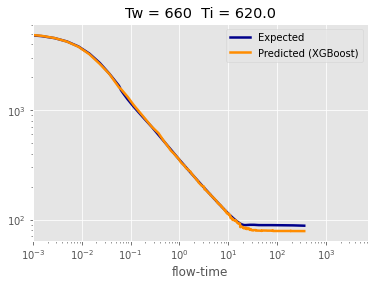

In [13]:
plot_test_results(val_df, model_type, target)

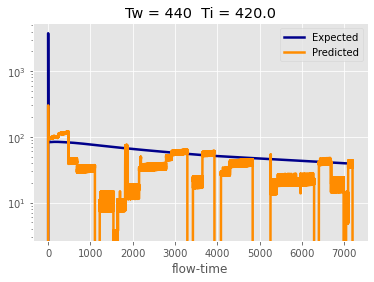

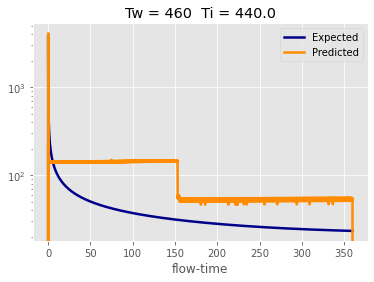

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


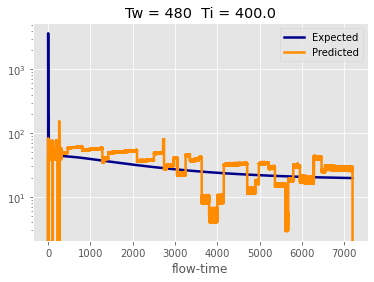

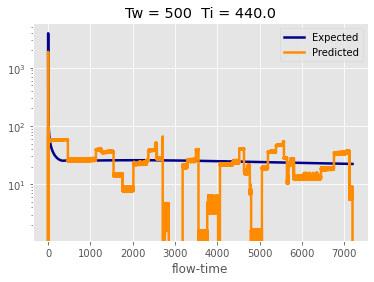

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


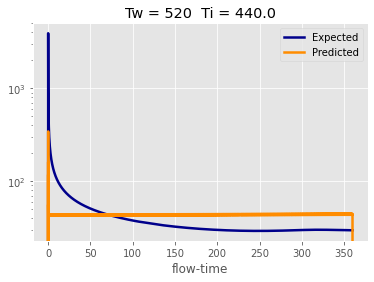

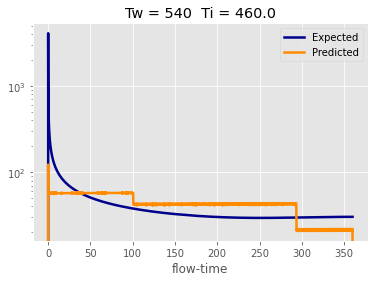

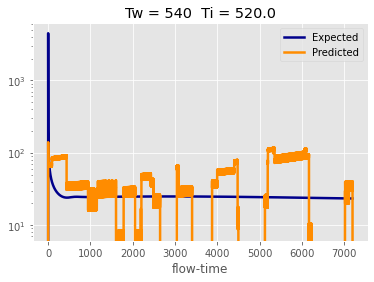

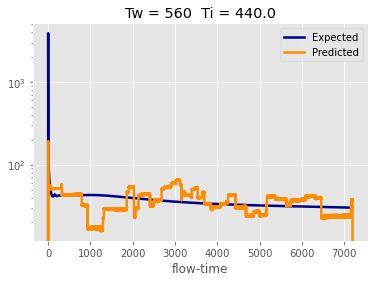

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


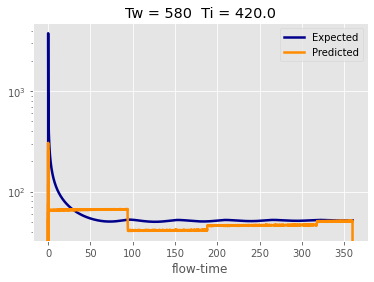

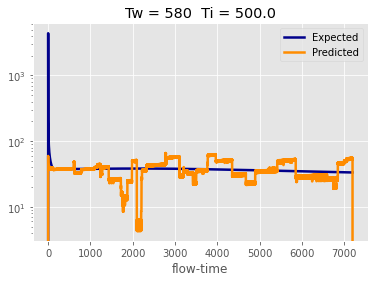

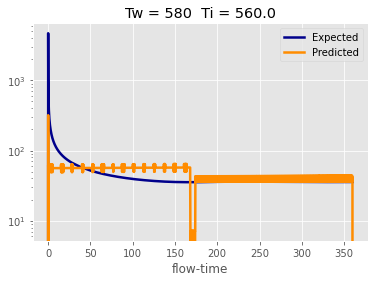

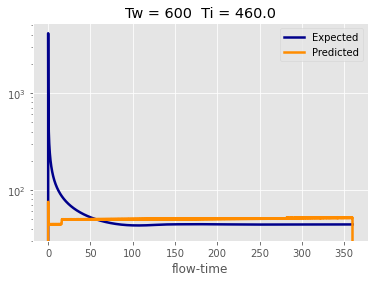

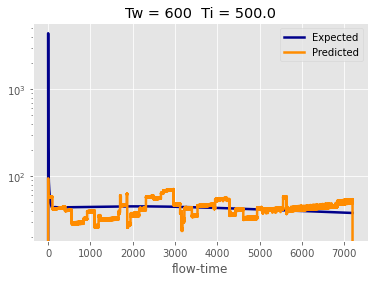

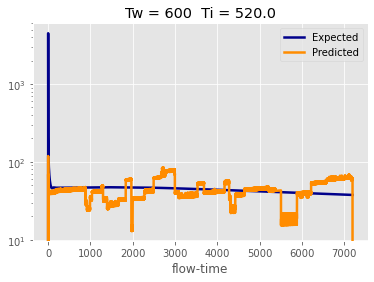

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


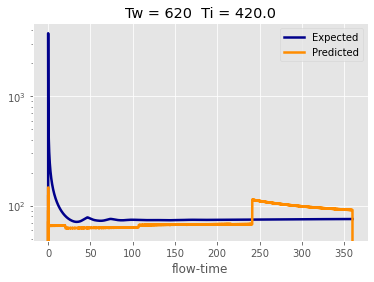

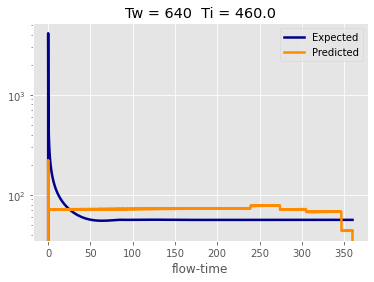

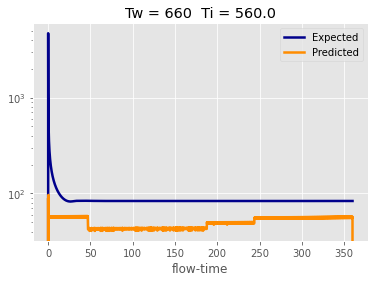

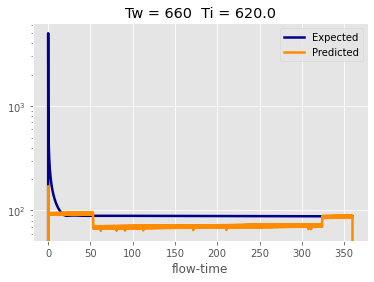

In [27]:
if target == 'Tavg':
    rmse, r2 = get_h_from_T_results(val_df, plot=True)
else:
    rmse, r2 = get_T_from_h_results(val_df, plot=True)

In [28]:
print(rmse)

83.74452690261293


In [29]:
print(r2)

-0.028326219249059648
